In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Create data generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Train ',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 433 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [6]:
# Create ResNet50 model
resnet_model = ResNet50(include_top=False, weights='imagenet', input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Freeze layers in ResNet50 model
for layer in resnet_model.layers:
    layer.trainable = False

# Add custom layers for classification task
x = Flatten()(resnet_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create new model for classification task
model = Model(inputs=resnet_model.input, outputs=output)

# Compile model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model on data generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10
)


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
13/13 [==============================] - 95s 7s/step - loss: 6.9829 - accuracy: 0.5012
Epoch 2/10
13/13 [==============================] - 59s 4s/step - loss: 0.6940 - accuracy: 0.4539
Epoch 3/10
13/13 [==============================] - 58s 4s/step - loss: 0.6934 - accuracy: 0.4489
Epoch 4/10
13/13 [==============================] - 59s 4s/step - loss: 0.6960 - accuracy: 0.4514
Epoch 5/10
13/13 [==============================] - 58s 4s/step - loss: 0.6932 - accuracy: 0.5012
Epoch 6/10
13/13 [==============================] - 58s 4s/step - loss: 0.6930 - accuracy: 0.5461
Epoch 7/10
13/13 [==============================] - 60s 5s/step - loss: 0.6929 - accuracy: 0.5481
Epoch 8/10
13/13 [==============================] - 58s 4s/step - loss: 0.6927 - accuracy: 0.5486
Epoch 9/10
13/13 [==============================] - 59s 4s/step - loss: 0.6926 - accuracy: 0.5436
Epoch 10/10
13/13 [==============================] - 

In [9]:
# Create ResNet50 model
resnet_model = ResNet50(include_top=False, weights='imagenet', input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Freeze layers in ResNet50 model
for layer in resnet_model.layers:
    layer.trainable = False

# Add custom layers for classification task
x = Flatten()(resnet_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create new model for classification task
model = Model(inputs=resnet_model.input, outputs=output)

# Compile model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model on data generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=20
)

Epoch 1/20
13/13 [==============================] - 62s 4s/step - loss: 4.8085 - accuracy: 0.5287
Epoch 2/20
13/13 [==============================] - 57s 4s/step - loss: 1.7758 - accuracy: 0.5212
Epoch 3/20
13/13 [==============================] - 58s 4s/step - loss: 2.3656 - accuracy: 0.5037
Epoch 4/20
13/13 [==============================] - 64s 5s/step - loss: 1.9669 - accuracy: 0.5461
Epoch 5/20
13/13 [==============================] - 58s 4s/step - loss: 1.3931 - accuracy: 0.5561
Epoch 6/20
13/13 [==============================] - 57s 4s/step - loss: 1.6339 - accuracy: 0.4963
Epoch 7/20
13/13 [==============================] - 59s 4s/step - loss: 1.4157 - accuracy: 0.5411
Epoch 8/20
13/13 [==============================] - 58s 4s/step - loss: 1.5083 - accuracy: 0.5536
Epoch 9/20
13/13 [==============================] - 59s 4s/step - loss: 1.1747 - accuracy: 0.5087
Epoch 10/20
13/13 [==============================] - 57s 4s/step - loss: 0.7424 - accuracy: 0.5910
Epoch 11/20
13/13 [

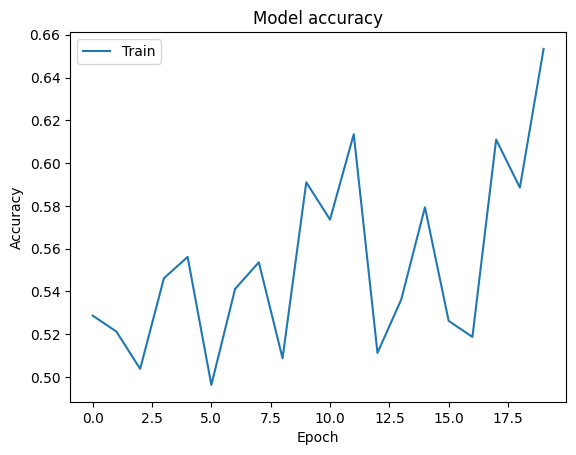

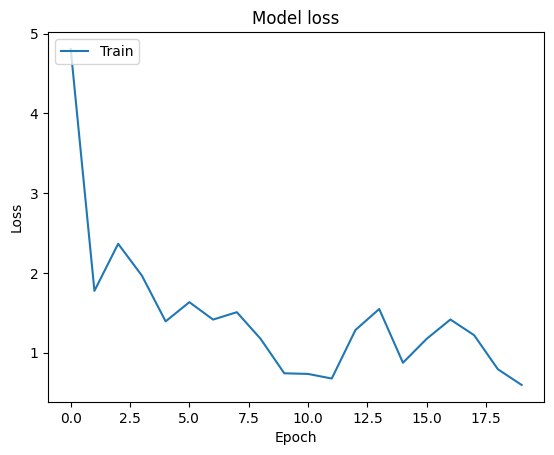

In [12]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
